# Complete guide to hands-ON A/B Testing

- Tutorial: [Six Sigma Pro SMART - Youtube](https://youtu.be/AQC7b68H7LU?si=5k30cZwOR5s69kSd)
- Dataset: [Marketing A/B - Kaggle](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing)

# Libraries and loading data

In [105]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

proj_dir = os.getcwd()

In [5]:
df = pd.read_csv(proj_dir+'\\marketing_AB.csv')

In [17]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [25]:
df.describe()

,total ads,most ads hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


In [13]:
df.duplicated(subset='user id').sum()

0

In [15]:
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [19]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [21]:
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [23]:
for i in df_cat.columns:
    print(i.upper(), ':', df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate analysis

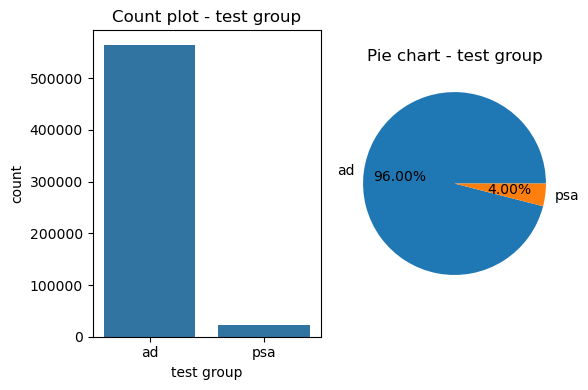

In [33]:
variable = 'test group'

plt.figure(figsize=(6,4))

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count plot - {variable}')

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

plt.tight_layout()
plt.show()

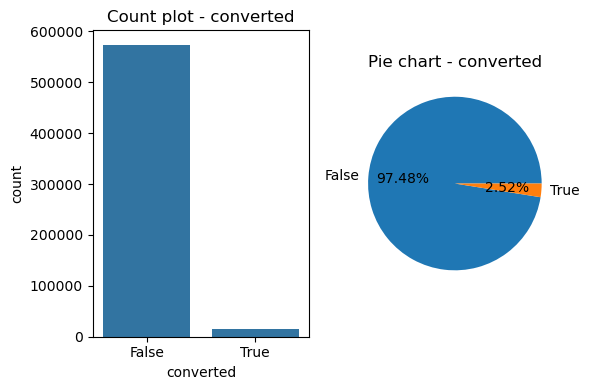

In [35]:
variable = 'converted'

plt.figure(figsize=(6,4))

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count plot - {variable}')

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

plt.tight_layout()
plt.show()

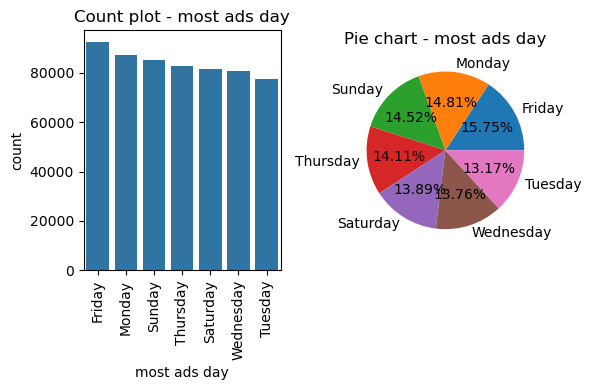

In [37]:
variable = 'most ads day'

plt.figure(figsize=(6,4))

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

plt.tight_layout()
plt.show()

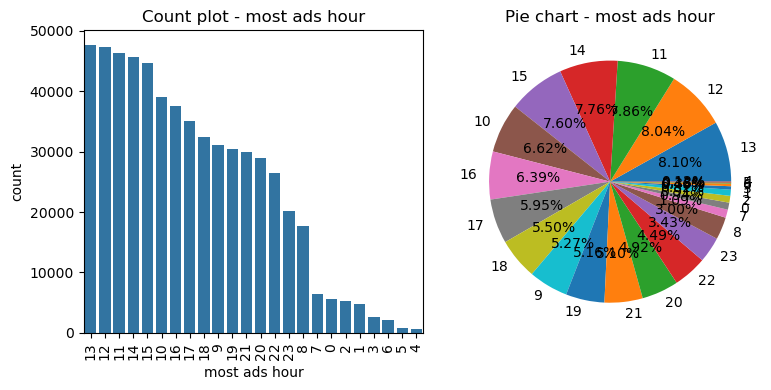

In [39]:
variable = 'most ads hour'

plt.figure(figsize=(8,4))

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

plt.tight_layout()
plt.show()

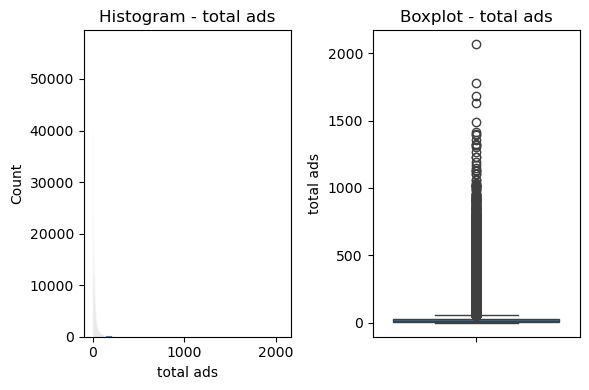

In [41]:
variable = 'total ads'

plt.figure(figsize=(6,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

# Pie chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

In [43]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

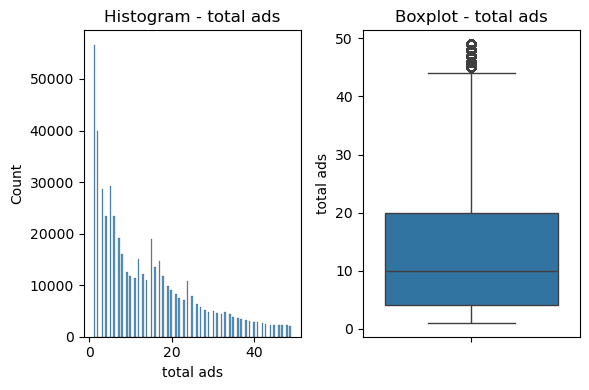

In [45]:
variable = 'total ads'

plt.figure(figsize=(6,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads']<50])
plt.title(f'Histogram - {variable}')

# Pie chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df['total ads']<50])
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

# Bivariate analysis

In [72]:
df.columns
# Here we compare one categorical variable with our target (numerical) column is "converted".

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [52]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

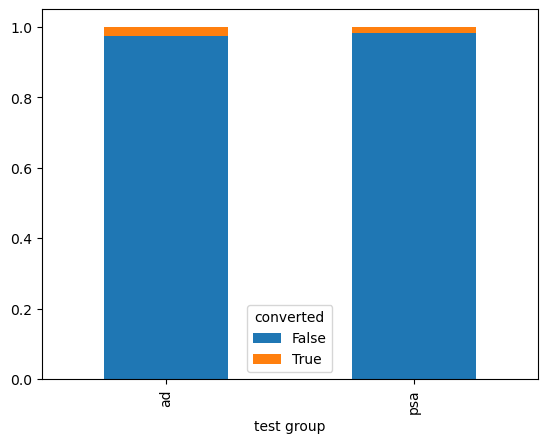

In [54]:
ct_conversion_test_group.plot.bar(stacked=True)

In [58]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
ct_conversion_day.sort_values(by=True, ascending=False)

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


<Axes: xlabel='most ads day'>

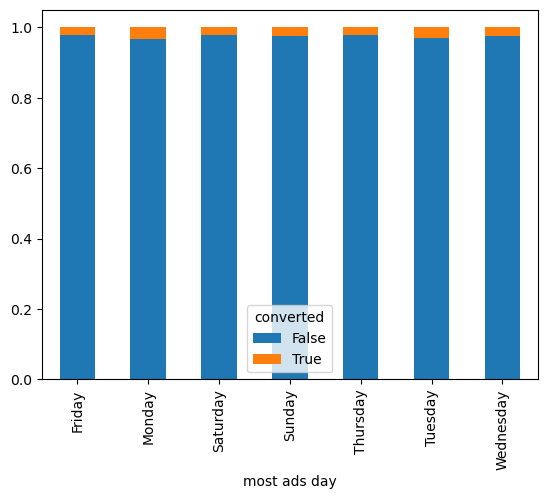

In [60]:
ct_conversion_day.plot.bar(stacked=True)

In [62]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
ct_conversion_hour.sort_values(by=True, ascending=False)

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


<Axes: xlabel='most ads hour'>

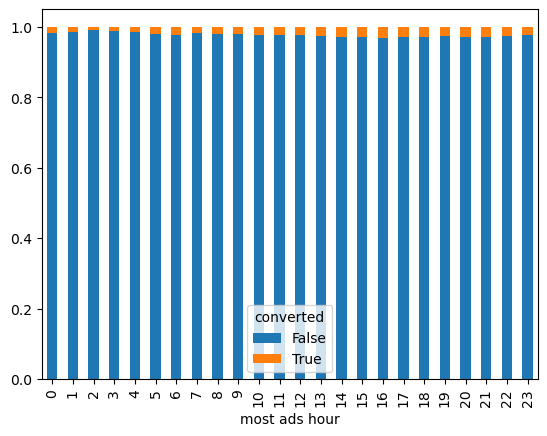

In [64]:
ct_conversion_hour.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

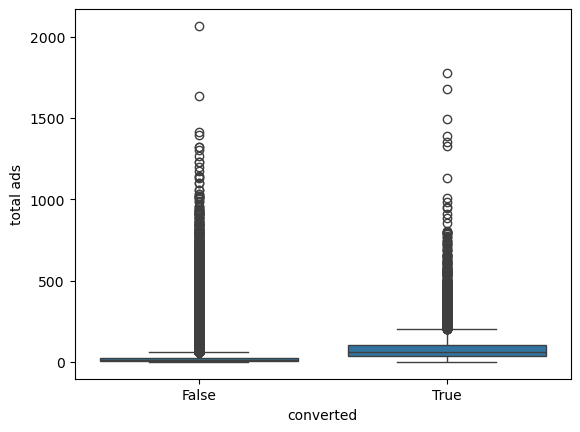

In [66]:
sns.boxplot(x='converted', y='total ads', data=df)

<Axes: xlabel='converted', ylabel='total ads'>

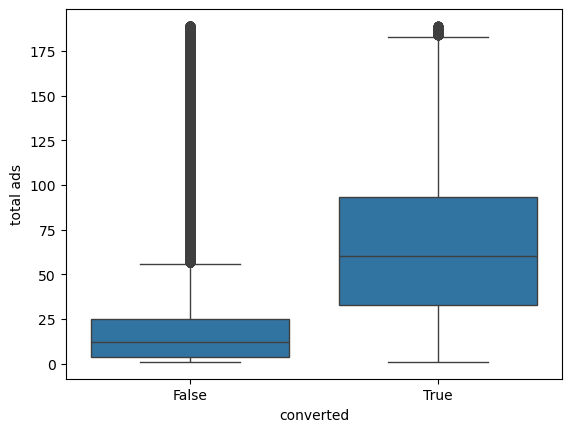

In [80]:
sns.boxplot(x='converted', y='total ads', data=df[df['total ads']<190])

# Statistical tests

In [96]:
# Comparing two categorical variables. TARGET variable: converted
alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        contingency_table = pd.crosstab(df_cat[variable], df['converted'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"Chi-squared test for '{variable}' vs. 'converted': ")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")
        if p < alpha:
            print(f"The difference in conversion rates across '{variable}' is statistically significant.")
        else:
            print(f"There is no significant different in conversion rates across '{variable}'.")
        print("\n")

Chi-squared test for 'test group' vs. 'converted': 
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across 'test group' is statistically significant.


Chi-squared test for 'most ads day' vs. 'converted': 
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across 'most ads day' is statistically significant.


Chi-squared test for 'most ads hour' vs. 'converted': 
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across 'most ads hour' is statistically significant.




All three of these tests reject the null hypothesis. This means that the difference between each group is significant.
In other words:

- The difference between the group that saw the ads and the group that saw the PSA matters to the conversion rate.
- The difference between the day the ads were shown matters to the conversion rate.
- The difference between the time the ads were shown matters to the conversion rate.

- Test between the numerical variable and a categorical variable
- Then we need to know if the distribution are normal or not ,and if the variances are equal or not.

In [120]:
df[df['converted']==True]['total ads']

15           9
44         265
107       1328
121        323
135        246
          ... 
586343      14
586818      11
586990       8
587069       4
587665       3
Name: total ads, Length: 14843, dtype: int64

In [122]:
df[df['converted']==False]['total ads']

0         130
1          93
2          21
3         355
4         276
         ... 
588096      1
588097      1
588098      3
588099      1
588100      1
Name: total ads, Length: 573258, dtype: int64

In [110]:
# Step 1: check assumptions
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted']==True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted']==False]['total ads'])
print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")
print(shapiro_stat_true, shapiro_stat_false)

Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
0.6578396248200824 0.47467424889275545


Both null hypothesis are rejected:
- Variables do not have normal distribution.
- Variables do not have equal variances.

In [114]:
# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']==True]['total ads'], df[df['converted']==False]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")
print(levene_stat)

Levene's test for equality of variances: p-value = 0.0
9121.196956737573


In [116]:
# Step 2: perform a suitable test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met - use t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']==True]['total ads'], df[df['converted']==False]['total ads'])
    print(f"Independent two sample t-tes: p-value = {t_p_value}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']==True]['total ads'], df[df['converted']==False]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


Due to the rejection of the null hypothesis, the distribution of each group is considered different. This means that there is a significant difference in the conversion rate if the group of people saw a lot of ads or just a few.

> The plots in the previous section give us a first idea of the differences between the variables. It is in this section (Statistical Tests) that we show whether or not these differences are (statistically) significant.